In [27]:
import pandas as pd
import os
os.getcwd()


'/Users/tanvirahmed/Desktop/delivery-orderflow-ml/notebooks/item_sales'

In [28]:
df = pd.read_csv("../../data/item_sales/grocery_sales_autumn_2025.csv")
df.head()

,date,venue_id,sku_id,phl1_id,phl2_id,phl3_id,operating_minutes,country_id,price,promo_flag,promo_depth,in_stock_minutes,stockout_flag,units_sold
0,2025-09-01,V001,S0001,P1_01,P2_03,P3_009,900,FI,0.55,0,0.0,900,0,67
1,2025-09-01,V001,S0002,P1_01,P2_03,P3_009,900,FI,0.55,0,0.0,900,0,45
2,2025-09-01,V001,S0003,P1_01,P2_03,P3_009,900,FI,0.65,0,0.0,900,0,32
3,2025-09-01,V001,S0004,P1_07,P2_21,P3_063,900,FI,1.75,0,0.0,900,0,51
4,2025-09-01,V001,S0005,P1_07,P2_21,P3_063,900,FI,1.15,0,0.0,900,0,39


In [29]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 40950 entries, 0 to 40949
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               40950 non-null  str    
 1   venue_id           40950 non-null  str    
 2   sku_id             40950 non-null  str    
 3   phl1_id            40950 non-null  str    
 4   phl2_id            40950 non-null  str    
 5   phl3_id            40950 non-null  str    
 6   operating_minutes  40950 non-null  int64  
 7   country_id         40950 non-null  str    
 8   price              40950 non-null  float64
 9   promo_flag         40950 non-null  int64  
 10  promo_depth        40950 non-null  float64
 11  in_stock_minutes   40950 non-null  int64  
 12  stockout_flag      40950 non-null  int64  
 13  units_sold         40950 non-null  int64  
dtypes: float64(2), int64(5), str(7)
memory usage: 4.4 MB


In [30]:
df.describe()

,operating_minutes,price,promo_flag,promo_depth,in_stock_minutes,stockout_flag,units_sold
count,40950.000000,40950.000000,40950.000000,40950.000000,40950.000000,40950.000000,40950.000000
mean,852.000000,3.290956,0.041074,0.009074,543.061514,0.376288,6.416386
std,69.972277,1.915742,0.198465,0.045556,409.640178,0.484460,15.500337
min,720.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,840.000000,1.990000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,900.000000,2.850000,0.000000,0.000000,840.000000,0.000000,0.000000
75%,900.000000,4.250000,0.000000,0.000000,900.000000,1.000000,2.000000
max,900.000000,12.390000,1.000000,0.400000,900.000000,1.000000,195.000000


In [34]:
df["date"] = pd.to_datetime(df["date"])
df["date"].min(), df["date"].max()

(Timestamp('2025-09-01 00:00:00'), Timestamp('2025-11-30 00:00:00'))

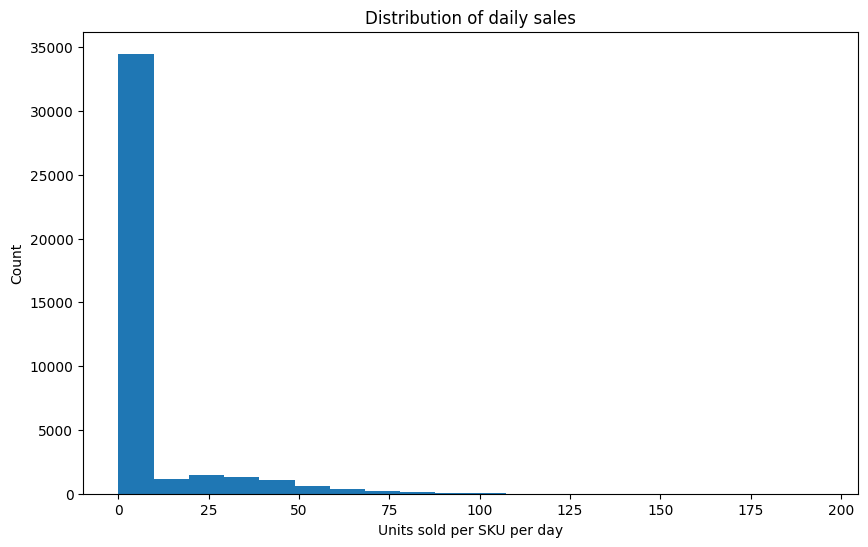

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df["units_sold"], bins=20)
plt.xlabel("Units sold per SKU per day")
plt.ylabel("Count")
plt.title("Distribution of daily sales")
plt.show()

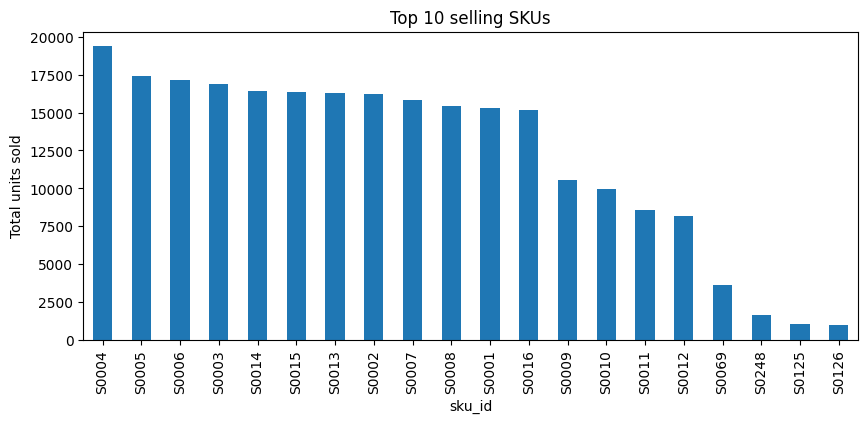

In [50]:
top_skus = (
    df.groupby("sku_id")["units_sold"]
      .sum()
      .sort_values(ascending=False)
      .head(20)
)

top_skus.plot(kind="bar", figsize=(10,4))
plt.title("Top 10 selling SKUs")
plt.ylabel("Total units sold")
plt.show()

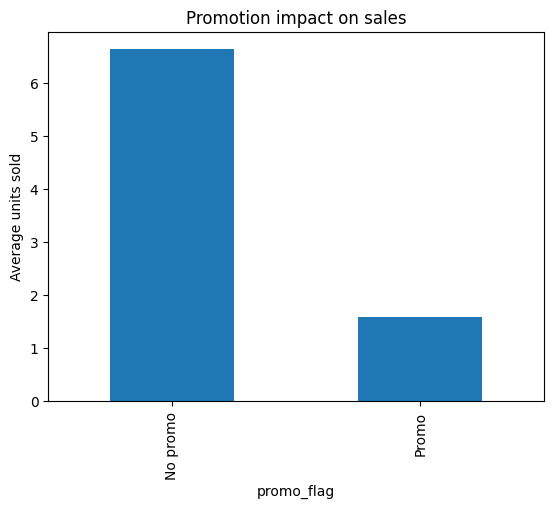

In [45]:
promo_sales = df.groupby("promo_flag")["units_sold"].mean()

promo_sales.plot(kind="bar")
plt.xticks([0,1], ["No promo", "Promo"])
plt.ylabel("Average units sold")
plt.title("Promotion impact on sales")
plt.show()

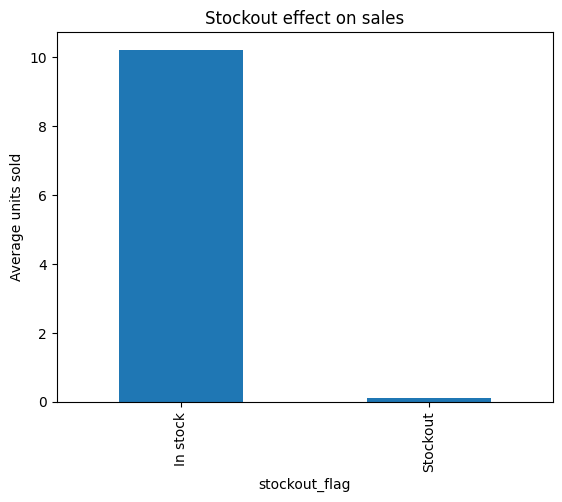

In [46]:
stockout_sales = df.groupby("stockout_flag")["units_sold"].mean()

stockout_sales.plot(kind="bar")
plt.xticks([0,1], ["In stock", "Stockout"])
plt.ylabel("Average units sold")
plt.title("Stockout effect on sales")
plt.show()

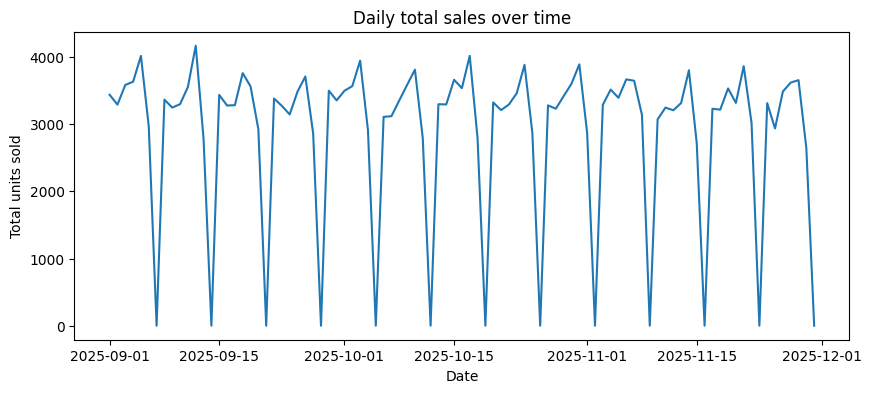

In [47]:
daily_sales = df.groupby("date")["units_sold"].sum()

plt.figure(figsize=(10,4))
plt.plot(daily_sales)
plt.xlabel("Date")
plt.ylabel("Total units sold")
plt.title("Daily total sales over time")
plt.show()

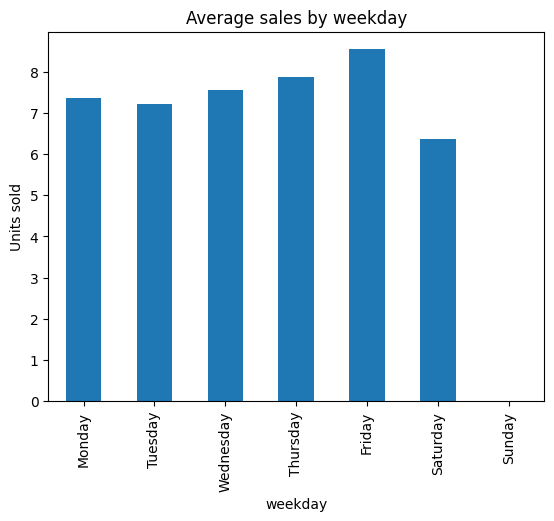

In [48]:
df["weekday"] = df["date"].dt.day_name()

weekday_sales = df.groupby("weekday")["units_sold"].mean()

weekday_sales = weekday_sales.reindex([
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
])

weekday_sales.plot(kind="bar")
plt.title("Average sales by weekday")
plt.ylabel("Units sold")
plt.show()